## Scene Classification

**Dataset:** This dataset contains about 3.5k images from a wide range of natural scenes from all around the world.
Goal is to identify which kind of scene can the image be categorized into. This is a 6 class problem with the classes being Buildings, Forests, Mountains, Glacier, Street, Sea.

**Tasks:** 
- Implementing a CNN using the Keras framework to accomplish the task.
- Performing the below 4 experiments in the notebook. For each experiment I perform data augmentation, use relu activations and max pooling.

**Experiments**

- Experiment 1: 4 CNN layers, no dropout
- Experiment 2: 4 CNN layers, dropout=0.2, add batchnorm
- Experiment 3: 4 CNN layers, dropout=0.2, add batchnorm, add glorot uniform ie Xavier uniform initialization,
For first 3 experiments I'll use rmsprop optimizer
- Experiment 4: Try to beat the performance of the above 3 models.

**Preprocessing the Image Data (Normalization & Augmentation)**

In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator generates batches of tensor image data with real-time data augmentation.

train_generator = ImageDataGenerator(
    rescale=1/255.,              # normalize pixel values between 0-1
    brightness_range=[0.1, 0.7], # specify the range in which to decrease/increase brightness
    width_shift_range=0.5,       # shift the width of the image 50%
    rotation_range=90,           # random rotation by 90 degrees
    horizontal_flip=True,        # 180 degree flip horizontally
    vertical_flip=True,          # 180 degree flip vertically
    validation_split=0.15        # 15% of the data will be used for validation at end of each epoch
)

In [26]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.15)

In [34]:
traingen_new = train_datagen.flow_from_directory('/content/drive/MyDrive/Visions Systems/train',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    subset='training',
                                                    shuffle=True)

validationgen_new = train_datagen.flow_from_directory('/content/drive/MyDrive/Visions Systems/valid',
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         target_size=(150, 150),
                                                          subset='validation',
                                                          shuffle=True)

Found 2550 images belonging to 6 classes.
Found 77 images belonging to 6 classes.


In [2]:
BATCH_SIZE = 32

# flow_from_directory() takes the path to a directory & generates batches of augmented data.

traingen = train_generator.flow_from_directory('/content/drive/MyDrive/Visions Systems/train',
                                               target_size=(128, 128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               subset='training',
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory('/content/drive/MyDrive/Visions Systems/valid',
                                               target_size=(128, 128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               subset='validation',
                                               shuffle=True,
                                               seed=42)

Found 2550 images belonging to 6 classes.
Found 77 images belonging to 6 classes.


**Experiment 1: 4 CNN layers, no dropout**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.regularizers import l1_l2

model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', input_shape=(128, 128, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary() # a handy way to inspect the architecture

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [10]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 8.6 MB/s 
     |████████████████████████████████| 381 kB 66.4 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


**Training the Network**

In [4]:
import tensorflow 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

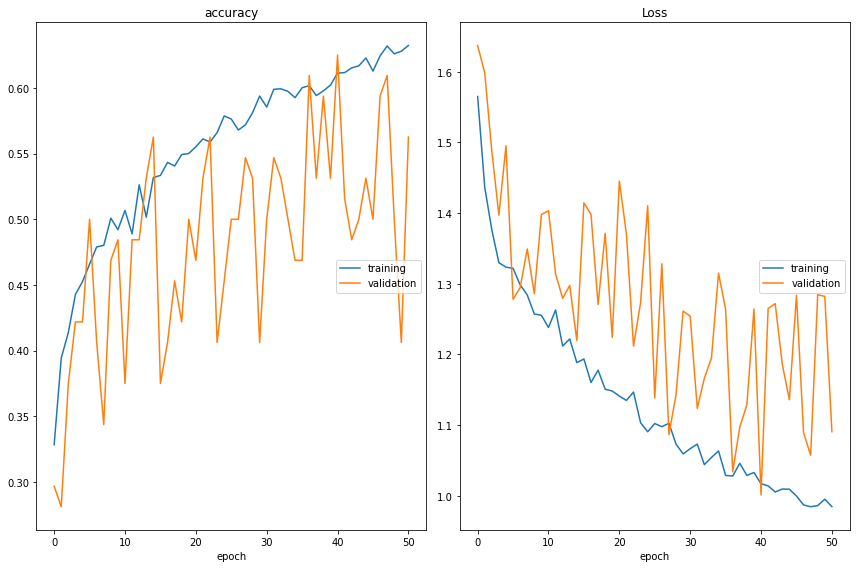

accuracy
	training         	 (min:    0.328, max:    0.632, cur:    0.632)
	validation       	 (min:    0.281, max:    0.625, cur:    0.562)
Loss
	training         	 (min:    0.985, max:    1.565, cur:    0.985)
	validation       	 (min:    1.001, max:    1.637, cur:    1.091)
CPU times: user 16min 34s, sys: 33.6 s, total: 17min 8s
Wall time: 16min 49s


In [ ]:
%%time

from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

n_epochs = 100

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(traingen,
                    epochs=n_epochs, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [38]:
test_generator = ImageDataGenerator(rescale=1/255.)

testgen = test_generator.flow_from_directory('/content/drive/MyDrive/Visions Systems/valid',
                                             target_size=(150, 150),
                                             batch_size=1,
                                             class_mode=None,
                                             shuffle=False,
                                             seed=42)

Found 521 images belonging to 6 classes.


In [ ]:
model.load_weights('img_model.weights.best.hdf5')

#predicted_classes = model.predict_classes(testgen)
#predicted_classes = (model.predict(testgen) > 0.5).astype("int32")
predicted_classes = np.argmax(model.predict(testgen),axis=1)

class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)
    
    results.sort_values(by='F-Score', ascending=False, inplace=True)                           
    global_acc = accuracy_score(y_true, y_preds)
    
    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = y_preds[idx]
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

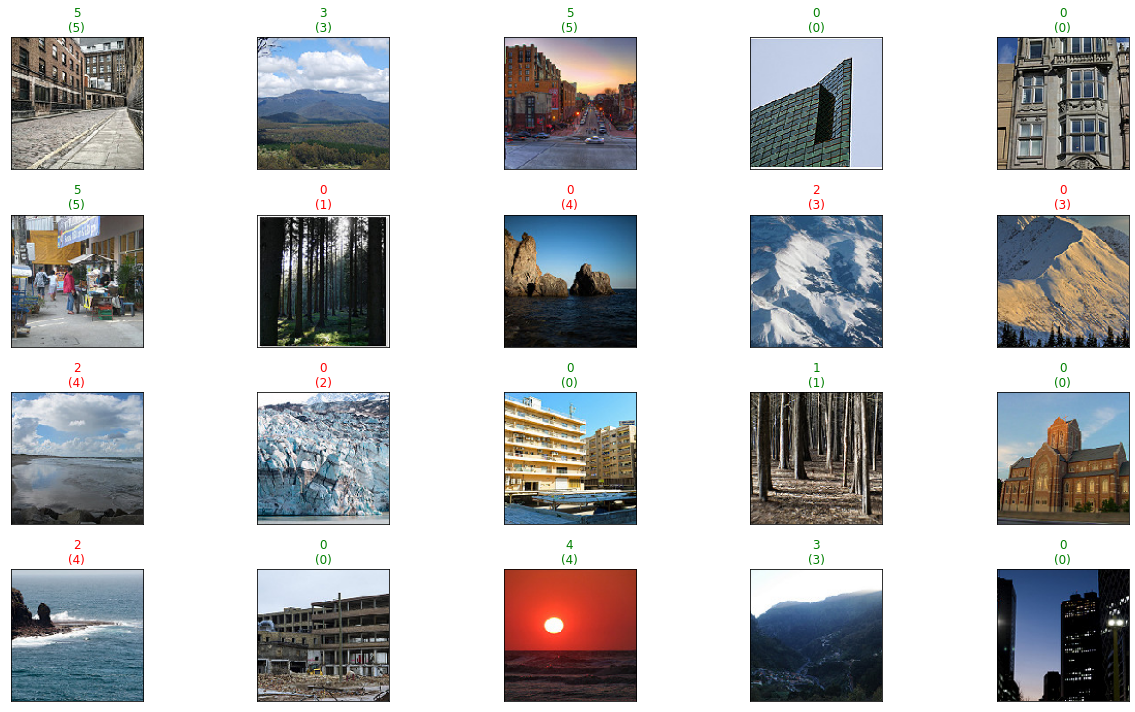

In [ ]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 60.65%


Precision    Recall   F-Score  Support
1   0.875000  0.900000  0.887324     70.0
5   0.676923  0.550000  0.606897     80.0
0   0.471616  0.824427  0.600000    131.0
2   0.646154  0.525000  0.579310     80.0
3   0.693878  0.425000  0.527132     80.0
4   0.609756  0.312500  0.413223     80.0

**Experiment 2: 4 CNN layers, dropout=0.2, add batchnorm**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.regularizers import l1_l2

model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', input_shape=(128, 128, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))


#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary() # a handy way to inspect the architecture

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 63, 63, 64)       

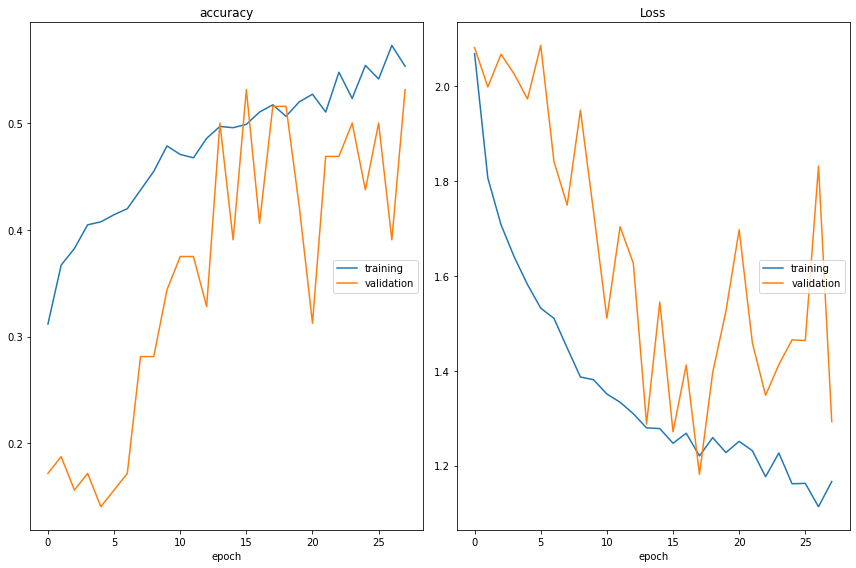

accuracy
	training         	 (min:    0.312, max:    0.573, cur:    0.553)
	validation       	 (min:    0.141, max:    0.531, cur:    0.531)
Loss
	training         	 (min:    1.113, max:    2.069, cur:    1.166)
	validation       	 (min:    1.181, max:    2.086, cur:    1.293)
CPU times: user 9min 44s, sys: 19.2 s, total: 10min 3s
Wall time: 10min 42s


In [ ]:
%%time

from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

n_epochs = 100

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf6', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(traingen,
                    epochs=n_epochs, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [ ]:
model.load_weights('img_model.weights.best.hdf6')

#predicted_classes = model.predict_classes(testgen)
#predicted_classes = (model.predict(testgen) > 0.5).astype("int32")
predicted_classes = np.argmax(model.predict(testgen),axis=1)

class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

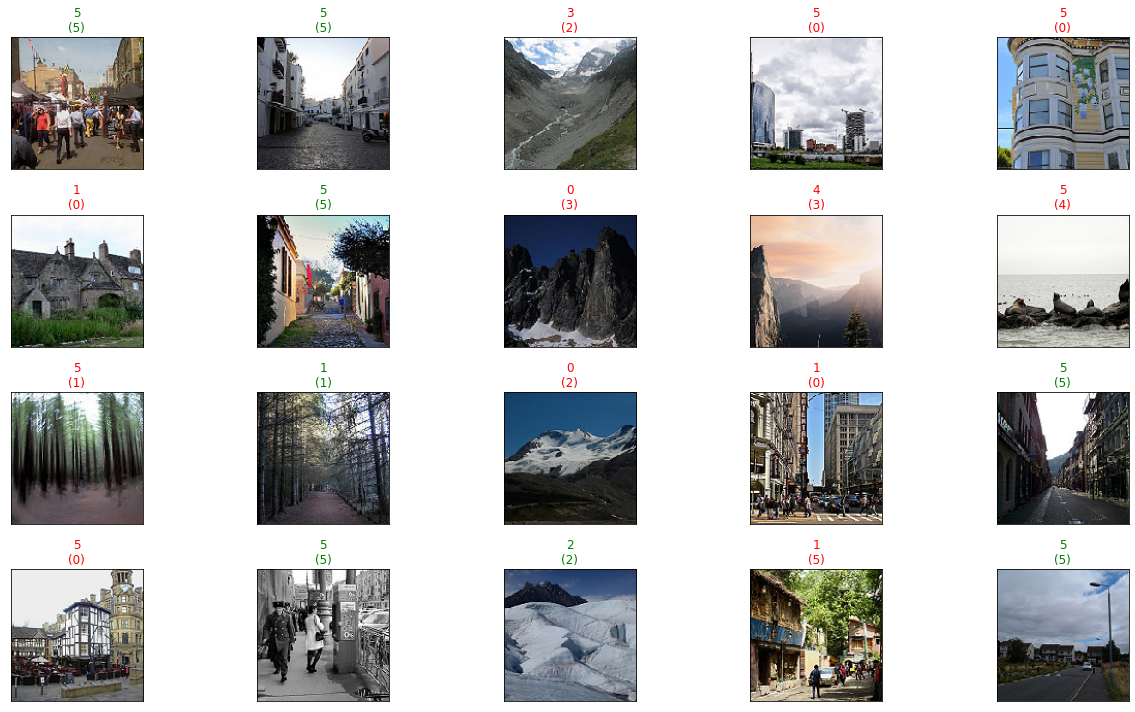

In [ ]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 48.18%


Precision    Recall   F-Score  Support
1   0.544000  0.971429  0.697436     70.0
5   0.386503  0.787500  0.518519     80.0
3   0.615385  0.400000  0.484848     80.0
4   0.470588  0.500000  0.484848     80.0
2   0.682927  0.350000  0.462810     80.0
0   0.363636  0.152672  0.215054    131.0

**Experiment 3: 4 CNN layers, dropout=0.2, add batchnorm, add glorot uniform ie Xavier uniform initialization**

In [5]:
initializer = tensorflow.keras.initializers.GlorotUniform()

In [ ]:
model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_initializer=initializer, input_shape=(128, 128, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())#batch normalization
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer=initializer))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer=initializer))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer=initializer))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))


#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary() # a handy way to inspect the architecture

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_39 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization_10 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 63, 63, 64)       

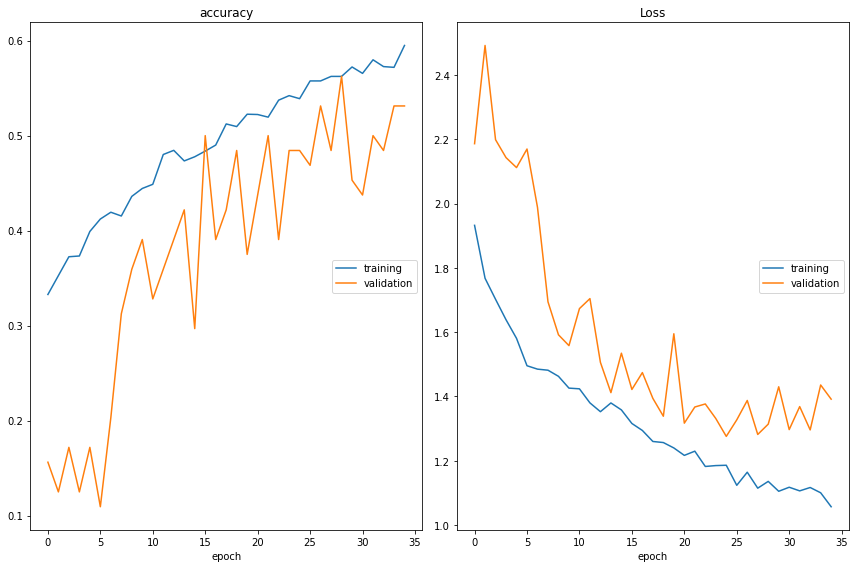

accuracy
	training         	 (min:    0.333, max:    0.595, cur:    0.595)
	validation       	 (min:    0.109, max:    0.562, cur:    0.531)
Loss
	training         	 (min:    1.057, max:    1.932, cur:    1.057)
	validation       	 (min:    1.276, max:    2.492, cur:    1.392)
CPU times: user 12min 4s, sys: 23.2 s, total: 12min 27s
Wall time: 14min 50s


In [ ]:
%%time

from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras

steps_per_epoch = traingen.samples // BATCH_SIZE
val_steps = validgen.samples // BATCH_SIZE

n_epochs = 100

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf7', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(traingen,
                    epochs=n_epochs, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validgen,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [ ]:
model.load_weights('img_model.weights.best.hdf7')

#predicted_classes = model.predict_classes(testgen)
#predicted_classes = (model.predict(testgen) > 0.5).astype("int32")
predicted_classes = np.argmax(model.predict(testgen),axis=1)

class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

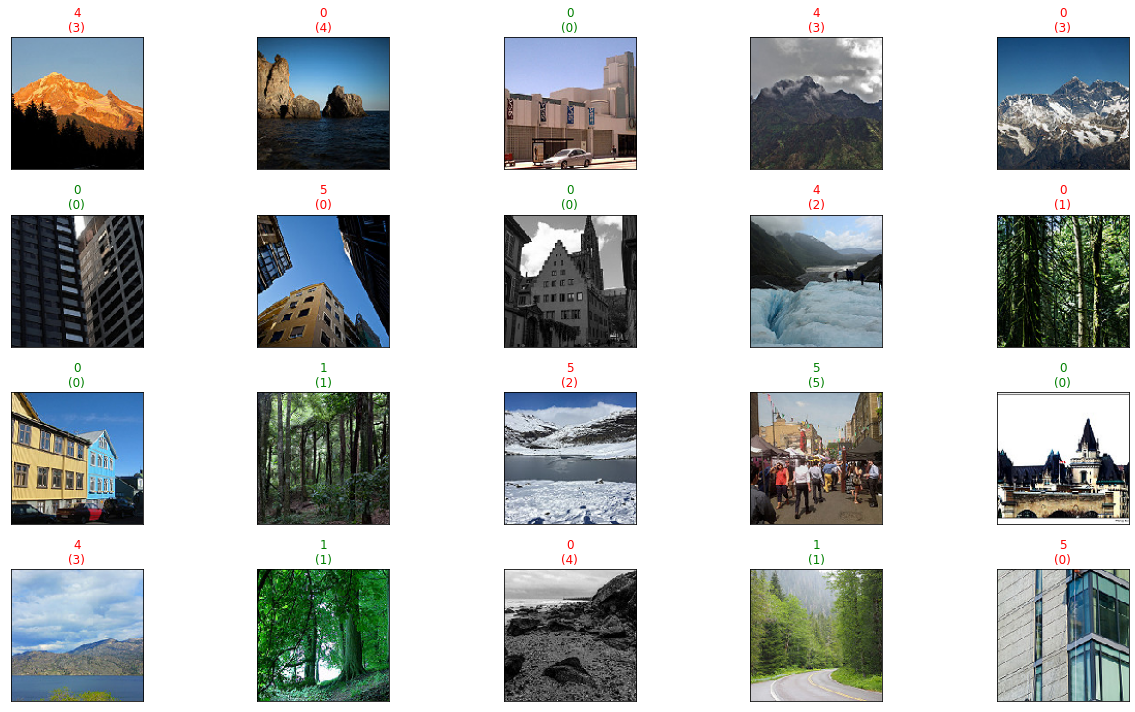

In [ ]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 53.55%


Precision    Recall   F-Score  Support
1   0.802817  0.814286  0.808511     70.0
0   0.550000  0.755725  0.636656    131.0
5   0.429825  0.612500  0.505155     80.0
4   0.362832  0.512500  0.424870     80.0
2   0.739130  0.212500  0.330097     80.0
3   0.800000  0.200000  0.320000     80.0

**Experiment 4: Trying to get better score than other experiments**

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.regularizers import l1_l2

model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))

#### Convolutional Layers ####
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))


#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

model.summary() # a handy way to inspect the architecture

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [36]:
%%time

from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras

steps_per_epoch = traingen_new.samples // BATCH_SIZE
val_steps = validationgen_new.samples // BATCH_SIZE

n_epochs = 100

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf8', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(traingen_new,
                    epochs=n_epochs, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validationgen_new,
                    validation_steps=val_steps,
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

accuracy
	training         	 (min:    0.382, max:    0.758, cur:    0.753)
	validation       	 (min:    0.312, max:    0.766, cur:    0.641)
Loss
	training         	 (min:    0.639, max:    1.517, cur:    0.657)
	validation       	 (min:    0.685, max:    1.378, cur:    0.764)
CPU times: user 13min 42s, sys: 28.1 s, total: 14min 10s
Wall time: 16min 18s


In [39]:
model.load_weights('img_model.weights.best.hdf8')

#predicted_classes = model.predict_classes(testgen)
#predicted_classes = (model.predict(testgen) > 0.5).astype("int32")
predicted_classes = np.argmax(model.predict(testgen),axis=1)

class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

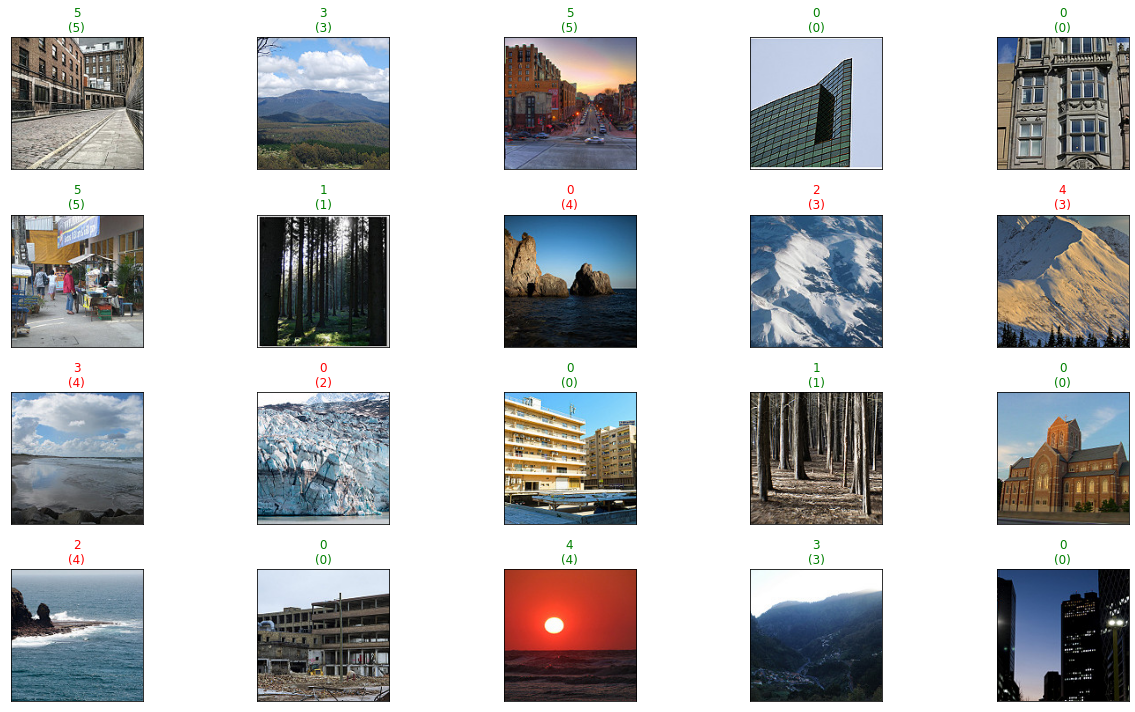

In [40]:
plot_predictions(true_classes, predicted_classes, testgen, class_indices)

In [41]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 75.05%


Precision    Recall   F-Score  Support
1   0.905405  0.957143  0.930556     70.0
0   0.760870  0.801527  0.780669    131.0
5   0.724138  0.787500  0.754491     80.0
2   0.787879  0.650000  0.712329     80.0
4   0.739130  0.637500  0.684564     80.0
3   0.609195  0.662500  0.634731     80.0

**Conclusion**

Analyzing the result of our experiments above,

* For Experiment 1(4 CNN layers, no dropout): I had overall categorical accuracy 
score of 60.65%, which is a fair model. It performed best in classifying the "1" class because good precision, recall and f1-score for that while it performed the worst in classifying the class "4". With the plot predictions, it was able to classify 13 images correctly out of 20. Which is quite a fair image classification model.

* For Experiment 2(4 CNN layers, dropout=0.2, Batchorm added): I didn't really get a good model with this, the overall categorical accuracy score was 48.18%. It also performed best in classifying the "1" class but only has a very good recall score for that, with an average precision and f1-score. It performed horribly in classifying other classes. For the plot predictions, it was able to classify 8 images out of 20. This isn't up to average, which shows this model is performing badly in classifying our natural scene images on the test dataset.

* For Experiment 3(4 CNN layers, dropout=0.2, add batchnorm, add glorot uniform): I got an overall categorical accuracy score of 53.55% in this model, it isn't also doing really well in classification. It performed best in classifying the "1" class to with precision, recall and f1-score of over 80% while it didn't really do well in classifying other classes. For the plot predictions, it was able to classify 9 images out of 20. This isn't also up to average, which shows the model is also performing badly in classifying the natural scene images on the test dataset.

* For Experiment 4(Beating the scores of other experiments): I tweaked the CNN models a lot to get a better model. Firstly, I tweaked the preprocessing by changing the target size to 150, 150(I got inspiration from an article I saw: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html and https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05).  I used 2 Convolution layers, with 0.1 dropout on the full-connected layer only. I didn't use batchnorm and kernel initializer. I also used Adam as my optimizer with learning rate of 0.0001. I got an Overall Categorical Accuracy Score of 75.05%, this is a clear improvement on the other experiments. It got over 60% Precision, Recall and f1-scores for all the classes, which shows it does a fairly good job in classifying the 6 image classes. I didn't see this with the other experiments. It was also able to classify 14 images correctly out of 20, which shows its a doing a good job in classifying the natural scene images on the test dataset.
